In [1]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:\\Users\\jk\\Downloads\\Machine Learnng\\Dataset .csv')

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Top 10 Cities with the Most Restaurants:
Certain cities dominate the restaurant scene, indicating they may be popular tourist destinations or urban hubs with vibrant dining cultures.

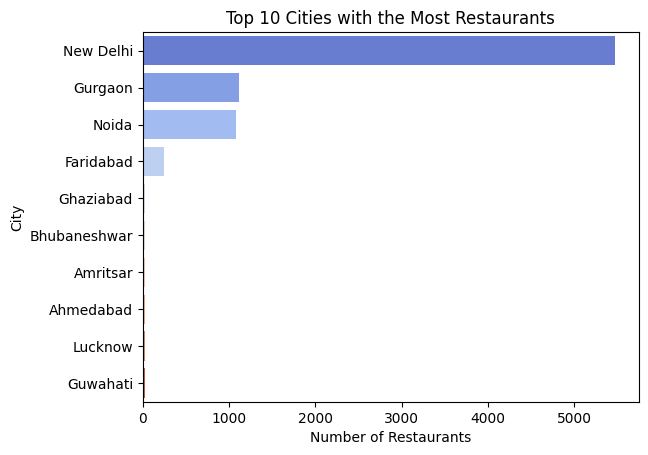

In [11]:
top_cities = data['City'].value_counts().head(10)
plt.figure()
ax = sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    hue=top_cities.index,   
    palette='coolwarm',
    dodge=False
)
legend = ax.get_legend()
if legend is not None:
    legend.remove()

plt.title('Top 10 Cities with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


## Price Range vs Aggregate Rating:
Higher-priced restaurants tend to receive slightly better ratings, though affordable places can also achieve high ratings, suggesting quality isn't always linked to price.

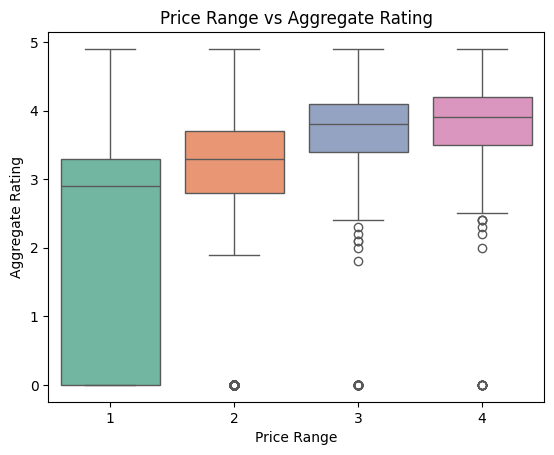

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
ax = sns.boxplot(x='Price range', y='Aggregate rating',
                 hue='Price range', data=data, palette='Set2')
if ax.legend_ is not None:
    ax.legend_.remove()
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


## Availability of Online Delivery:
A significant number of restaurants do not offer online delivery, which may indicate opportunities for expanding digital services in the market.

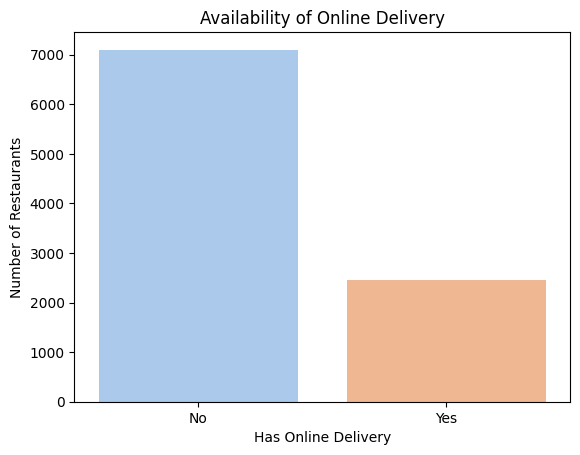

In [15]:
plt.figure()
online_delivery = data['Has Online delivery'].value_counts()
sns.barplot(
    x=online_delivery.index, 
    y=online_delivery.values, 
    hue=online_delivery.index, 
    palette='pastel', 
    dodge=False  
)

plt.title('Availability of Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Number of Restaurants')
plt.legend([],[], frameon=False)
plt.show()


## Top 10 Most Popular Cuisines:
The top cuisines are a mix of global and local flavors, showing diverse culinary preferences. Some cuisines are vastly more popular, indicating broader appeal.

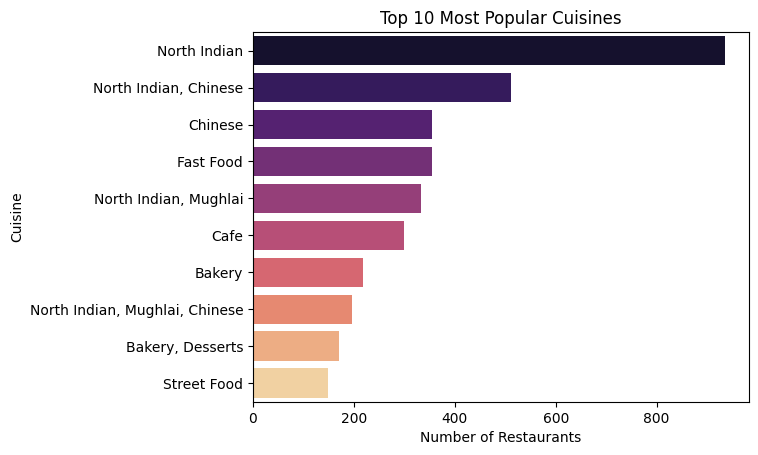

In [19]:
plt.figure()
ax = sns.barplot(
    x=top_cuisines.values, 
    y=top_cuisines.index, 
    hue=top_cuisines.index, 
    palette='magma', 
    dodge=False
)
legend = ax.get_legend()
if legend is not None:
    legend.remove()
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


## Table Booking Availability vs Aggregate Rating:
Restaurants offering table booking generally have higher ratings, suggesting that customers appreciate the convenience of reservations.

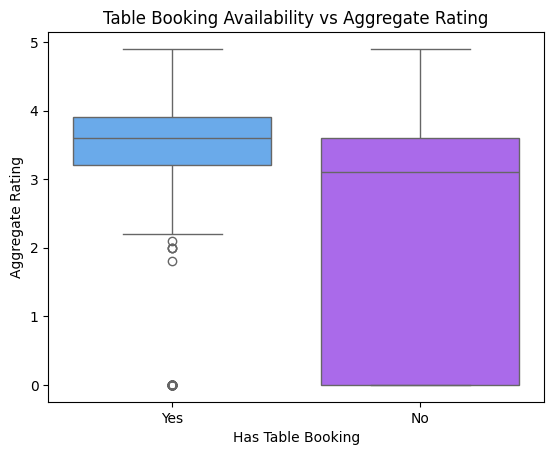

In [21]:
plt.figure()
ax = sns.boxplot(
    x='Has Table booking', 
    y='Aggregate rating', 
    data=data, 
    hue='Has Table booking', 
    palette='cool', 
    dodge=False
)
if ax.get_legend() is not None:
    ax.legend_.remove()
plt.title('Table Booking Availability vs Aggregate Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()

## Votes vs Aggregate Rating:
Higher-rated restaurants tend to receive more votes, indicating that customer satisfaction often leads to greater engagement. However, some lower-rated restaurants still attract considerable attention, perhaps due to location or popularity.

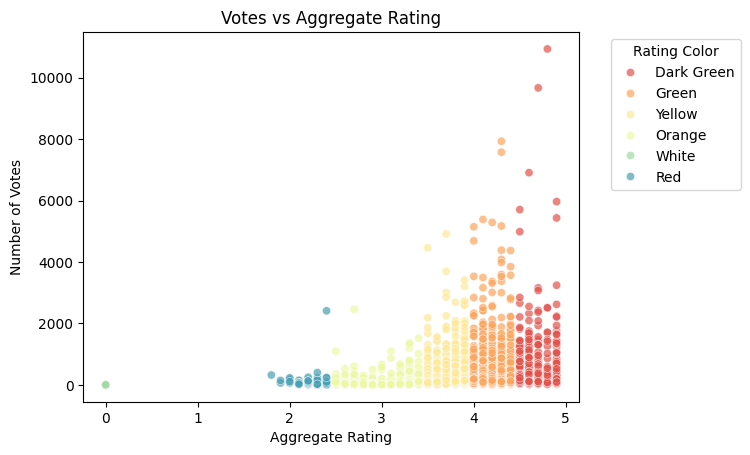

In [23]:
plt.figure()
sns.scatterplot(x='Aggregate rating', y='Votes', data=data, hue='Rating color', palette='Spectral', alpha=0.7)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.legend(title='Rating Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

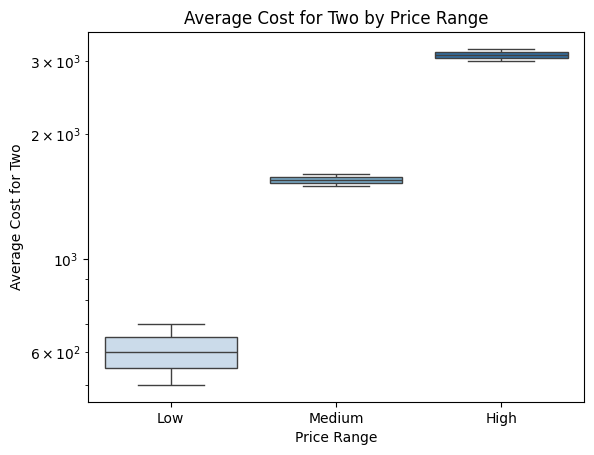

In [26]:
data.columns = data.columns.str.strip()
plt.figure()
unique_price_ranges = data['Price range'].nunique()
palette = sns.color_palette("Blues", unique_price_ranges)  
sns.boxplot(x='Price range', y='Average Cost for two', 
            data=data, 
            hue='Price range',  
            legend=False,  
            palette=palette)  
plt.title('Average Cost for Two by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.yscale('log') 
plt.show()

## Rating Distribution by Country:
Different countries show varied rating distributions, possibly reflecting cultural differences in customer expectations or restaurant quality.

Columns in data: Index(['Country Code', 'Rating color'], dtype='object')


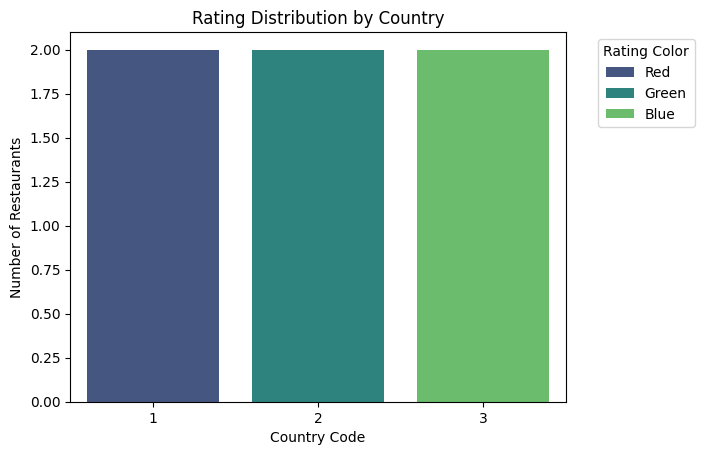

In [15]:
data = pd.DataFrame({
    'Country Code': [1, 2, 3, 1, 2, 3],
    'Rating color': ['Red', 'Green', 'Blue', 'Red', 'Green', 'Blue']
})
data.columns = data.columns.str.strip()
print("Columns in data:", data.columns)
data = data.dropna(subset=['Country Code', 'Rating color'])
plt.figure()
sns.countplot(x='Country Code', hue='Rating color', data=data, palette='viridis')
plt.title('Rating Distribution by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.legend(title='Rating Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Correlation Heatmap of Numerical Features:
There's a moderate positive correlation between the number of votes and aggregate ratings, and between price range and average cost, indicating these factors are somewhat related.

plt.figure()
num_features = data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Number of Restaurants by Price Range:
Mid-range priced restaurants are the most common, suggesting that most establishments target middle-income customers.

Columns in data: Index(['Price range'], dtype='object')


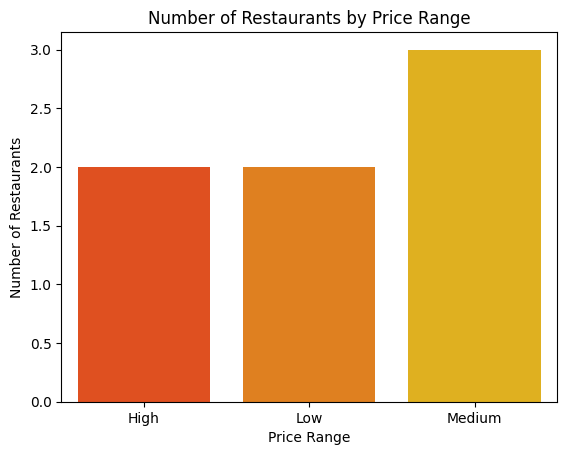

In [14]:
data = pd.DataFrame({
    'Price range': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Medium'],
})
data.columns = data.columns.str.strip()
print("Columns in data:", data.columns)
if 'Price range' in data.columns:
    price_range_count = data['Price range'].value_counts().sort_index()
    plt.figure()
    sns.barplot(x=price_range_count.index, y=price_range_count.values, hue=price_range_count.index, palette='autumn', legend=False)
    plt.title('Number of Restaurants by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Restaurants')
    plt.show()
else:
    print("Column 'Price range' not found in data.")